Step 1: Data Preparation

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/GirlsScriptOpenSource/Hedging-of-Financial-Derivatives/Explainable AI for Transparent Hedging Decisions/synthetic_hedging_dataset.csv')

# Split data into features and target
X = df.drop(columns='hedging_decision')
y = df['hedging_decision']

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import shap
import matplotlib.pyplot as plt

In [ ]:
# Step 2: Model Training
# Train a Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Train a Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Step 3: Model Evaluation

# Predict on the test set
rf_predictions = rf_model.predict(X_test)
lr_predictions = lr_model.predict(X_test)

# Evaluate accuracy
rf_accuracy = accuracy_score(y_test, rf_predictions)
lr_accuracy = accuracy_score(y_test, lr_predictions)

print("Random Forest Accuracy:", rf_accuracy)
print("Logistic Regression Accuracy:", lr_accuracy)

Random Forest Accuracy: 0.505
Logistic Regression Accuracy: 0.48


In [ ]:
# Step 4: Explainable AI with SHAP

# Explain Random Forest model
rf_explainer = shap.TreeExplainer(rf_model)
rf_shap_values = rf_explainer.shap_values(X_test)

# Explain Logistic Regression model
lr_explainer = shap.LinearExplainer(lr_model, X_train)
lr_shap_values = lr_explainer.shap_values(X_test)


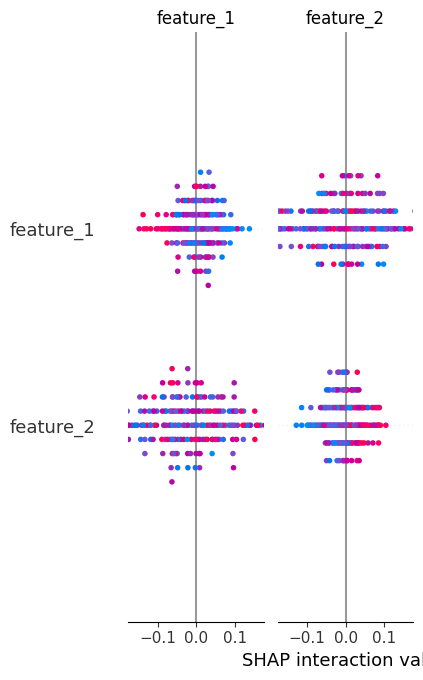

In [ ]:
# Step 5: Visualization

# Summary plot for Random Forest
shap.summary_plot(rf_shap_values, X_test, feature_names=X.columns)
plt.show()



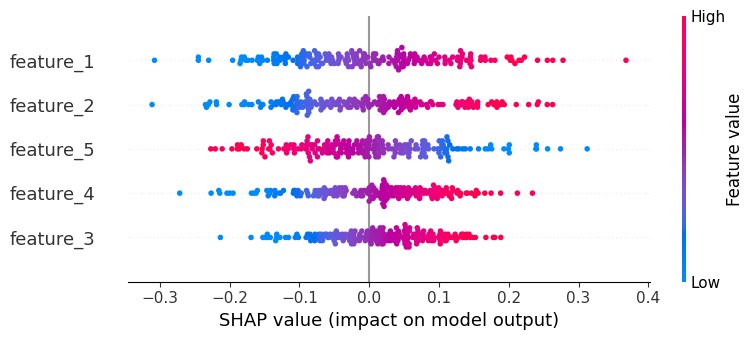

In [ ]:
# Summary plot for Logistic Regression
shap.summary_plot(lr_shap_values, X_test, feature_names=X.columns)
plt.show()

In [ ]:
# Force plot for a single prediction (Random Forest) for class 1
shap.initjs()
shap.force_plot(rf_explainer.expected_value[1], rf_shap_values[0,:,1], X_test.iloc[0,:], feature_names=X.columns)

In [ ]:
# Force plot for a single prediction (Logistic Regression)
shap.initjs()
shap.force_plot(lr_explainer.expected_value, lr_shap_values[0,:], X_test.iloc[0,:], feature_names=X.columns)